In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_246068.csv', skiprows=4)


In [42]:
data.head(4)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Unnamed: 69
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107624.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,769294618.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,42647492.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,521764076.0,NaN


In [43]:
print(data.columns)


Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', 'Unnamed: 69'],
      dtype='object')


In [44]:
data= data.dropna(axis=1, how='all')
data=data.drop(columns=['Indicator Name', 'Indicator Code'])
data.head(2)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,58694.0,58990.0,...,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107624.0
1,Africa Eastern and Southern,AFE,130075728.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,153281203.0,157704381.0,...,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,769294618.0


In [47]:
id_vars =['Country Name','Country Code']
df_data=pd.melt(data, id_vars=id_vars, var_name ='Year',value_name='Population')
df_data.head(2)

,Country Name,Country Code,Year,Population
0,Aruba,ABW,1960,54922.0
1,Africa Eastern and Southern,AFE,1960,130075728.0


In [50]:
df_data ['Year']
df_Final=df_data.dropna(subset=['Population'])
df_Final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17195 entries, 0 to 17289
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  17195 non-null  object 
 1   Country Code  17195 non-null  object 
 2   Year          17195 non-null  object 
 3   Population    17195 non-null  float64
dtypes: float64(1), object(3)
memory usage: 671.7+ KB


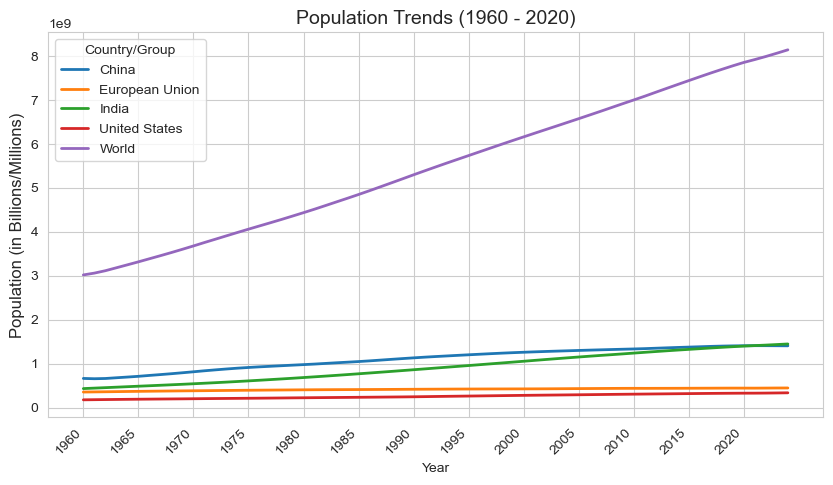

Plotting complete with simplified code.


In [65]:

sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))

countries_to_plot = ['WLD', 'USA', 'CHN', 'IND', 'EUU']
df_data = df_Final[df_Final['Country Code'].isin(countries_to_plot)]
sns.lineplot(
    data=df_data,
    x='Year',
    y='Population',
    hue='Country Name', 
    linewidth=2

)
plt.xticks(
    df_data['Year'].unique()[::5], # Select every 5th year from the unique years
    rotation=45,
    ha='right'
)
plt.title('Population Trends (1960 - 2020)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Population (in Billions/Millions)', fontsize=12)
plt.legend(title='Country/Group')
plt.show()

print("Plotting complete with simplified code.")